In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
dat= pd.read_csv("heart.csv")

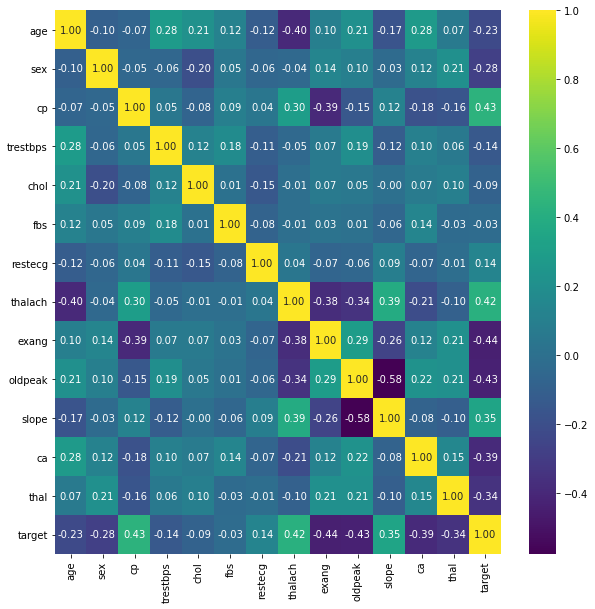

In [2]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(dat.corr(), annot=True, fmt='.2f',cmap = "viridis")

In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_data = data
heart_data['sex'] = heart_data['sex'].astype('object')
heart_data['cp'] = heart_data['cp'].astype('object')
heart_data['fbs'] = heart_data['fbs'].astype('object')
heart_data['restecg'] = heart_data['restecg'].astype('object')
heart_data['exang'] = heart_data['exang'].astype('object')
heart_data['slope'] = heart_data['slope'].astype('object')
heart_data['thal'] = heart_data['thal'].astype('object')
heart_data = pd.get_dummies(heart_data)

In [7]:
data = heart_data
target_name = 'target'
data_target = data[target_name]
data = data.drop([target_name], axis=1)
train, test, target, target_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [8]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, target)
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

c:\users\adithya\anaconda3\envs\nnfinal\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


87.19

In [9]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

85.25

In [10]:
# Support Vector Machines

svc = SVC()
svc.fit(train, target)
acc_svc = round(svc.score(train, target) * 100, 2)
acc_svc

66.53

In [11]:
acc_test_svc = round(svc.score(test, target_test) * 100, 2)
acc_test_svc

68.85

In [12]:
# Linear SVC

linear_svc = LinearSVC(dual=False)  
linear_svc.fit(train, target)
acc_linear_svc = round(linear_svc.score(train, target) * 100, 2)
acc_linear_svc

86.78

In [13]:
acc_test_linear_svc = round(linear_svc.score(test, target_test) * 100, 2)
acc_test_linear_svc

85.25

In [14]:
# k-Nearest Neighbors algorithm

knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(train, target)
acc_knn = round(knn.score(train, target) * 100, 2)
print(acc_knn, knn.best_params_)

77.69 {'n_neighbors': 3}


In [15]:
acc_test_knn = round(knn.score(test, target_test) * 100, 2)
acc_test_knn

63.93

In [16]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

83.06

In [17]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

85.25

In [18]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, target)
acc_perceptron = round(perceptron.score(train, target) * 100, 2)
acc_perceptron

54.55

In [19]:
acc_test_perceptron = round(perceptron.score(test, target_test) * 100, 2)
acc_test_perceptron

55.74

In [20]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, target)
acc_sgd = round(sgd.score(train, target) * 100, 2)
acc_sgd

67.77

In [21]:
acc_test_sgd = round(perceptron.score(test, target_test) * 100, 2)
acc_test_sgd

55.74

In [22]:
# # Decision Tree Classifier

decision_tree = DecisionTreeClassifier(max_depth=7, random_state = 1)

decision_tree = decision_tree.fit(train, target)

In [23]:
sssss = round(decision_tree.score(test, target_test) * 100, 2)
sssss

80.33

In [24]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'random_state': [100],'n_estimators': [100, 300]}, cv=5)
random_forest.fit(train, target)
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest
# print(acc_random_forest,random_forest.best_params_)


88.52

In [25]:
print(acc_test_random_forest,random_forest.best_params_)


88.52 {'n_estimators': 100, 'random_state': 100}


In [26]:
# Ridge Classifier

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(train, target)
acc_ridge_classifier = round(ridge_classifier.score(train, target) * 100, 2)
acc_ridge_classifier

86.36

In [27]:
acc_test_ridge_classifier = round(ridge_classifier.score(test, target_test) * 100, 2)
acc_test_ridge_classifier

85.25

In [28]:
# Bagging Classifier

bagging_classifier = BaggingClassifier()
bagging_classifier.fit(train, target)
Y_pred = bagging_classifier.predict(test).astype(int)
acc_bagging_classifier = round(bagging_classifier.score(train, target) * 100, 2)
acc_bagging_classifier

98.76

In [29]:
acc_test_bagging_classifier = round(bagging_classifier.score(test, target_test) * 100, 2)
acc_test_bagging_classifier

80.33

In [30]:
# Extra Trees Classifier

extra_trees_classifier = ExtraTreesClassifier(random_state = 100)
extra_trees_classifier.fit(train, target)
acc_etc = round(extra_trees_classifier.score(train, target) * 100, 2)
acc_etc

100.0

In [31]:
acc_test_etc = round(extra_trees_classifier.score(test, target_test) * 100, 2)
acc_test_etc

86.89

In [34]:
c = set()
c.add((metrics.accuracy_score(target_test, logreg.predict(test)),metrics.f1_score(target_test, logreg.predict(test)),"logreg"))
c.add((metrics.accuracy_score(target_test, svc.predict(test)),metrics.f1_score(target_test, svc.predict(test)),"svc"))
c.add((metrics.accuracy_score(target_test, linear_svc.predict(test)),metrics.f1_score(target_test, linear_svc.predict(test)),"linear_svc"))
c.add((metrics.accuracy_score(target_test, knn.predict(test)),metrics.f1_score(target_test, knn.predict(test)),"knn"))
c.add((metrics.accuracy_score(target_test, gaussian.predict(test)),metrics.f1_score(target_test, gaussian.predict(test)),"gaussian"))
c.add((metrics.accuracy_score(target_test, perceptron.predict(test)),metrics.f1_score(target_test, perceptron.predict(test)),"perceptron"))
c.add((metrics.accuracy_score(target_test, sgd.predict(test)),metrics.f1_score(target_test, sgd.predict(test)),"sgd"))
c.add((metrics.accuracy_score(target_test, decision_tree.predict(test)),metrics.f1_score(target_test, decision_tree.predict(test)),"decision_tree"))
c.add((metrics.accuracy_score(target_test, random_forest.predict(test)),metrics.f1_score(target_test, random_forest.predict(test)),"random_forest"))
c.add((metrics.accuracy_score(target_test, ridge_classifier.predict(test)),metrics.f1_score(target_test, ridge_classifier.predict(test)),"ridge_classifier"))
c.add((metrics.accuracy_score(target_test, bagging_classifier.predict(test)),metrics.f1_score(target_test, bagging_classifier.predict(test)),"bagging_classifier"))
c.add((metrics.accuracy_score(target_test, extra_trees_classifier.predict(test)),metrics.f1_score(target_test, extra_trees_classifier.predict(test)),"extra_trees_classifier"))


In [35]:
sorted(c)

[(0.5573770491803278, 0.7157894736842105, 'perceptron'),
 (0.639344262295082, 0.6666666666666667, 'knn'),
 (0.6885245901639344, 0.7594936708860759, 'svc'),
 (0.7213114754098361, 0.7951807228915663, 'sgd'),
 (0.8032786885245902, 0.8125, 'bagging_classifier'),
 (0.8032786885245902, 0.8235294117647058, 'decision_tree'),
 (0.8524590163934426, 0.8695652173913043, 'gaussian'),
 (0.8524590163934426, 0.8695652173913043, 'logreg'),
 (0.8524590163934426, 0.8732394366197184, 'linear_svc'),
 (0.8524590163934426, 0.8732394366197184, 'ridge_classifier'),
 (0.8688524590163934, 0.8823529411764706, 'extra_trees_classifier'),
 (0.8852459016393442, 0.8955223880597014, 'Ada_Boost'),
 (0.8852459016393442, 0.8985507246376812, 'random_forest')]

In [43]:
for l in range(1,5,1):
    op = []
    for i,j,k,c in zip(linear_svc.predict(test),gaussian.predict(test),decision_tree.predict(test),random_forest.predict(test)):
        if i+j+k+c<l:
            o = 0
        else:
            o = 1
        op.append(o)
    print(l)
    print(metrics.f1_score(target_test, op))
    print(metrics.accuracy_score(target_test, op))

1
0.8648648648648648
0.8360655737704918
2
0.8767123287671232
0.8524590163934426
3
0.9275362318840579
0.9180327868852459
4
0.7868852459016393
0.7868852459016393


In [48]:
from itertools import combinations
combs  = [logreg.predict(test),
svc.predict(test),
linear_svc.predict(test),
knn.predict(test),
gaussian.predict(test),
perceptron.predict(test),
sgd.predict(test),
decision_tree.predict(test),
random_forest.predict(test),
ridge_classifier.predict(test),
bagging_classifier.predict(test),
extra_trees_classifier.predict(test)]

diffcomb = combinations(combs,4)

In [49]:
major = set()
count = 0
z = list(diffcomb)
for com in z:
    for l in range(1,6,1):
        op = []
        for i,j,k,aa in zip(com[0],com[1],com[2],com[3]):
            if i+j+k+aa<l:
                o = 0
            else:
                o = 1
            op.append(o)
        major.add((metrics.f1_score(target_test, op),metrics.accuracy_score(target_test, op),count))
    
    count+=1

In [55]:
sorted(major)[-1]

(0.9275362318840579, 0.9180327868852459, 491)

In [51]:
for i in z[491]:
    print(metrics.f1_score(target_test, i))
    print(metrics.accuracy_score(target_test, i))

0.8235294117647058
0.8032786885245902
0.8985507246376812
0.8852459016393442
0.8732394366197184
0.8524590163934426
0.8823529411764706
0.8688524590163934


In [53]:
op = []
for i,j,k,c in zip(linear_svc.predict(test),gaussian.predict(test),decision_tree.predict(test),random_forest.predict(test)):
    if i+j+k+c<=2:
        o = 0
    else:
        o = 1
    op.append(o)
print(metrics.classification_report(target_test, op))
print(metrics.confusion_matrix(target_test, op))
    

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.91      0.94      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

[[24  3]
 [ 2 32]]


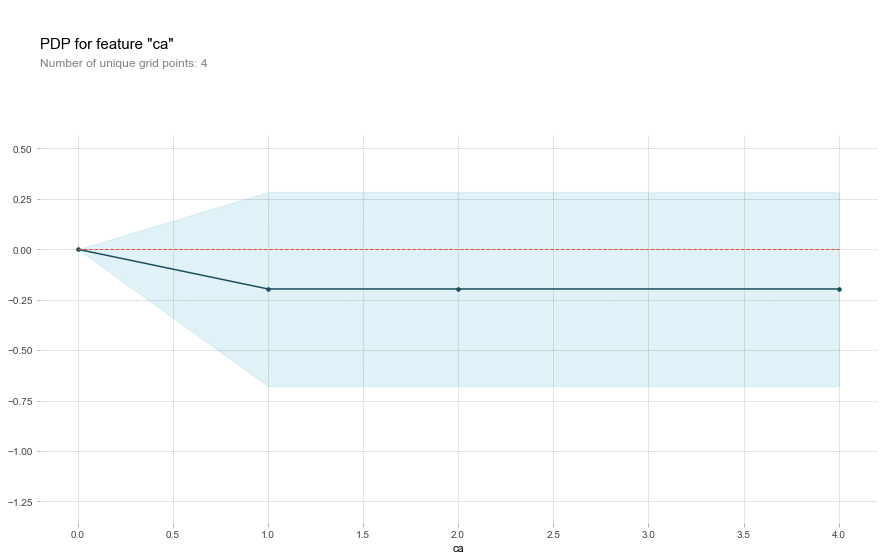

In [62]:

from pdpbox import pdp, info_plots #for partial plots
dt = data
base_features = dt.columns.values.tolist()
# base_features.remove('target')

feat_name = 'ca'
pdp_dist = pdp.pdp_isolate(model=e, dataset=test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show() 	

In [81]:
from sklearn.tree import export_graphviz #plot tree

model = RandomForestClassifier(max_depth=5)
model.fit(train, target)



estimator = model.estimators_[1]
feature_names = [i for i in train.columns]
y_train = target
y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)